In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image
import tensorly as tl
from tensorly.regression.tucker_regression import TuckerRegressor
from tensorly.base import tensor_to_vec, partial_tensor_to_vec
from skimage import color
from sklearn.metrics import mean_squared_error
import matplotlib
import re
import os
import cv2
import scipy.ndimage as ndi
from skimage.feature import hog
from sklearn.metrics import mean_squared_error

ModuleNotFoundError: No module named 'cv2'

In [3]:
import tensorly as tl


In [2]:
import matplotlib as mpl
mpl.rc("savefig", dpi=100) # Adjust for higher-resolution figures

In [3]:
def read_img(path):
    """
    Read image and store it as an array, given the image path. 
    Returns the 3 dimensional image array.
    """
    img = Image.open(path)
    ###Resize
    img = img.resize((640,360),Image.ANTIALIAS)
    
    img_arr = np.array(img, dtype='int32')
    img.close()
    return img_arr

def display_image(arr):
    """
    display the image
    input : 3 dimensional array
    """
    arr = arr.astype(dtype='uint8')
    img = Image.fromarray(arr, 'RGB')
    imshow(np.asarray(img))


In [4]:
# #Raw image preprocessing for cropping

# raw_working_dir = r'C:\Users\Edward\Documents\DonationCoder\AutomaticScreenshotter\Screenshots\2020\11\30'

# l = len([name for name in os.listdir(raw_working_dir)])

# img_arr = np.zeros((l,250,410,3))

# cter = 0

# for i, filename in enumerate(os.listdir(raw_working_dir)):
#     cter += 1
#     #print(filename)
#     img = read_img(raw_working_dir + '\\' + filename)
#     img_arr[i] = img[50:-60,40:-190,:]
    
    
#     matplotlib.image.imsave('C:\\Users\\Edward\\ISYE6740_project\\data\\image_stream\\video6\\img6stream' + str(i) + '.jpg', img_arr[i].astype(np.uint8))
    
#     if cter == 39:
#             break


# l = len([name for name in os.listdir(working_dir)])
# img_arr = np.zeros((l,360,640,3))

# for i ,filename  in enumerate(sorted(os.listdir(working_dir), key=numericalSort)):
#     #print ("Current File Being Processed is: " + infile)
#     img = read_img(working_dir + '\\' + filename)
#     img_arr[i] = img

In [5]:
# import pickle

# with open(working_dir + '\\img_dic.p', 'wb') as fp:
#     pickle.dump(img_dic, fp, protocol=pickle.HIGHEST_PROTOCOL)
    
# # with open(working_dir + '\\tens_dic.p', 'rb') as fp:
# #     tens_dic = pickle.load(fp)

In [6]:
#regex for reading files in order
def numericalSort(value):
    numbers = re.compile(r'(\d+)')
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

In [7]:
working_dir = r'C:\Users\Edward\ISYE6740_project\data\image_stream'
#working_dir = r'C:\Users\Edward\ISYE6740_project\data\image_stream\video1'

In [16]:
f = [name for name in os.listdir(working_dir)]

In [9]:
fail_stamp = {1:22, 2:30, 3:25, 4:37, 5:32, 6:15}

# video1 fails at 22

# video2 fails at 30

# video3 fails at 25

# video4 fails at 37

# video5 fails at 32

# video6 fails at 15

In [10]:
#normalize an black-white image to 0 - 1
def norm01(I):
    I = (I - np.min(I))/np.ptp(I)
    return I

#normalize an black-white image to 0 - 255
def norm255(I):
    I = (I - np.min(I))/np.ptp(I)
    I = np.round((I*255)).astype(int)
    return I

#apply sobel mask to an black-white image
def sobel(I):
    I = norm255(I)
    op = np.array([[1, 2, 1],[ 0, 0, 0],[-1, -2, -1]] )/8
    x_mask = op.T
    y_mask = op
    fx = ndi.convolve(I,x_mask,mode='nearest')
    fy = ndi.convolve(I,y_mask,mode='nearest')
    return np.sqrt(fx**2+fy**2)

#apply laplacian mask to an black-white image
def lap(I):
    I = norm255(I)
    Lap = np.array([[0, -1, 0],[-1,4, -1],[0, -1, 0]])
    flap = ndi.convolve(I,Lap,mode='nearest')
    return flap

def fhog(I):
    ppc = 2
    cpb = 2
    
    h, him = hog(I, visualize=True,
                 pixels_per_cell=(ppc, ppc),
                 cells_per_block=(cpb, cpb),
                 block_norm="L2-Hys")
    return him

In [11]:
# sum, give a list of images, return each image's sum
def l2(l):
    out = []
    for i in l:
        out.append(np.linalg.norm(i, ord = 2))
    return out

# l1norm, give a list of images, return each image's l1norm
def l1(l):
    out = []
    for i in l:
        out.append(np.linalg.norm(i, ord = 1))
    return out

# for change detection
#take a list, give the difference of each index, will be len(l) - 1.
def find_dif(l):
    out = []
    for i in range(len(l)-1):
        out.append(l[i] - l[i+1])
    return out

In [17]:
img_dic = {}
img_dic_bw = {}
for folder in f:
    folderdir = working_dir + '\\' + folder
    l = len([name for name in os.listdir(folderdir)])
    #img_arr = np.zeros((l,360,640,3))
    img_arr = np.zeros((l,72,128,3))
    img_arr_bw = np.zeros((l,72,128))
    
    for i ,filename  in enumerate(sorted(os.listdir(folderdir), key=numericalSort)):
        #print ("Current File Being Processed is: " + infile)
        img = read_img(folderdir + '\\' + filename)
        
        img = np.array(img, dtype='uint8')
        res = cv2.resize(img, dsize=(128,72))
        img_arr[i] = res
        img_arr_bw[i] = norm01(color.rgb2gray(res))
        
    img_dic[folder] = img_arr
    img_dic_bw[folder] = img_arr_bw

In [18]:
img_dic['video4'].shape

(45, 72, 128, 3)

In [19]:
img_dic_bw['video4'].shape

(45, 72, 128)

Text(0.5, 1.0, 'Laplacian Filter')

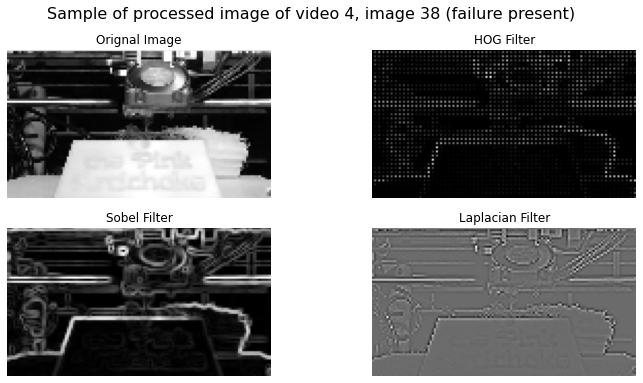

In [20]:
fig, axarr = plt.subplots(2,2, figsize=(12, 6))

fig.suptitle("Sample of processed image of video 4, image 38 (failure present)", fontsize=16)

axarr[0,0].imshow(img_dic_bw['video4'][38], cmap='gray')
axarr[0,0].axis('off')    
axarr[0,0].set_title('Orignal Image')

axarr[0,1].imshow(fhog(img_dic_bw['video4'][38]), cmap='gray')
axarr[0,1].axis('off')
axarr[0,1].set_title('HOG Filter')

axarr[1,0].imshow(sobel(img_dic_bw['video4'][38]), cmap='gray')
axarr[1,0].axis('off')
axarr[1,0].set_title('Sobel Filter')

axarr[1,1].imshow(lap(img_dic_bw['video4'][38]), cmap='gray')
axarr[1,1].axis('off')
axarr[1,1].set_title('Laplacian Filter')



Text(0.5, 1.0, 'Laplacian Filter')

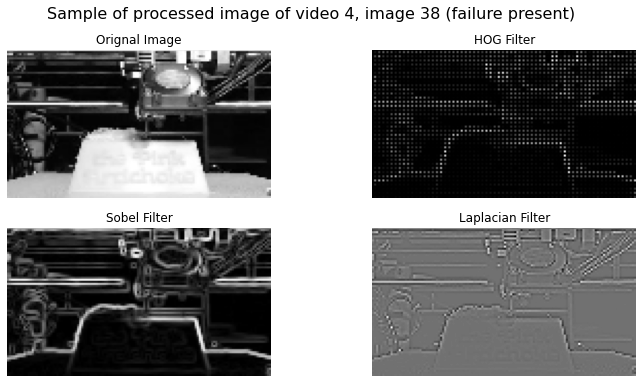

In [21]:
img_index = 37
fig, axarr = plt.subplots(2,2, figsize=(12, 6))

fig.suptitle("Sample of processed image of video 4, image 38 (failure present)", fontsize=16)

axarr[0,0].imshow(img_dic_bw['video4'][img_index], cmap='gray')
axarr[0,0].axis('off')    
axarr[0,0].set_title('Orignal Image')

axarr[0,1].imshow(fhog(img_dic_bw['video4'][img_index]), cmap='gray')
axarr[0,1].axis('off')
axarr[0,1].set_title('HOG Filter')

axarr[1,0].imshow(sobel(img_dic_bw['video4'][img_index]), cmap='gray')
axarr[1,0].axis('off')
axarr[1,0].set_title('Sobel Filter')

axarr[1,1].imshow(lap(img_dic_bw['video4'][img_index]), cmap='gray')
axarr[1,1].axis('off')
axarr[1,1].set_title('Laplacian Filter')



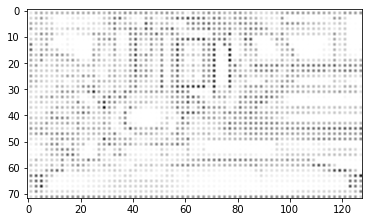

In [52]:
imshow(1-fhog(img_dic_bw['video4'][8]), cmap= 'gray')

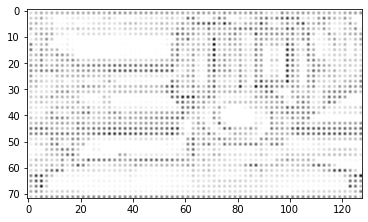

In [53]:
imshow(1-fhog(img_dic_bw['video4'][9]), cmap= 'gray')

In [50]:
len(img_dic_bw['video4'])

45

In [49]:
counter = 0
i0 = None
for i in img_dic_bw['video4']:    
    if i0 != None:
        print(counter, i0 - (1-fhog(i)).sum())   
    i0 = (1-fhog(i)).sum()    
    counter += 1

1 -16.743376888305647
2 -7.7020817357552005
3 -11.704125831107376
4 -0.5168288199893141
5 48.5155125739293
6 -38.21384872173803
7 -48.320516617000976
8 64.68879525139346
9 6.026569572692097
10 -66.20855371432845
11 17.706482836241776
12 -24.457121056795586
13 -1.194352525875729
14 1.897175315170898
15 -5.132648796177818
16 0.8297927241983416
17 -7.263025366850343
18 -3.6716816823682166
19 -15.043354727808037
20 -8.456923370831646
21 32.96594033551082
22 -35.75273481990007
23 37.328993545314006
24 -46.52436015326748
25 34.539857649553596
26 -65.24250634861528
27 43.87726377820218
28 -10.472112755131093
29 -31.711090251301357
30 -6.953735357179539
31 17.330969668350008
32 -6.0698934479733
33 -22.229064565377485
34 -20.330808306112885
35 -8.698038148322667
36 4.237626127349358
37 0.5216797740013135
38 -11.328603921783724
39 20.50938489042892
40 0.6335094233145355
41 -24.378993114471086
42 -3.5299717057932867
43 -20.743326313247962
44 18.736783353546343


In [ ]:
v = 6
fail_at = fail_stamp[v]
#plotting only s_list

In [ ]:
s_list = []
l_list = []
h_list = []
for img in img_dic_bw['video'+str(v)]:
    s = norm01(sobel(img))
    l = norm01(lap(img))
    h = norm01(fhog(img))
    #print(np.linalg.norm(norm_img))
    s_list.append(s)
    l_list.append(l)
    h_list.append(h)

In [ ]:
plt.title('Video ' +str(v) + ' using Sobel filter (fails at image ' + str(fail_at) + ')')
plt.plot(l2(s_list), label='l2 norms')
plt.plot(l1(s_list), label='l1 norms')
plt.plot(find_dif(l2(s_list)), label='difference of l2 norms')
plt.plot(find_dif(l1(s_list)), label='difference of l1 norms', color = 'purple')
plt.axvline(x=fail_at, color = 'r', linestyle='--', label='print failure at img '+ str(fail_at))
plt.legend()

In [ ]:
plt.title('Video ' +str(v) + ' using hog filter (fails at image ' + str(fail_at) + ')')
plt.plot(l2(h_list), label='l2 norms')
plt.plot(l1(h_list), label='l1 norms')
plt.plot(find_dif(l2(h_list)), label='difference of l2 norms')
plt.plot(find_dif(l1(h_list)), label='difference of l1 norms', color = 'purple')
plt.axvline(x=fail_at, color = 'r', linestyle='--', label='print failure at img '+ str(fail_at))
plt.legend()

In [ ]:
plt.title('Video ' +str(v) + ' using lap filter (fails at image ' + str(fail_at) + ')')
plt.plot(l2(l_list), label='l2 norms')
plt.plot(l1(l_list), label='l1 norms')
plt.plot(find_dif(l2(l_list)), label='difference of l2 norms')
plt.plot(find_dif(l1(l_list)), label='difference of l1 norms', color = 'purple')
plt.axvline(x=fail_at, color = 'r', linestyle='--', label='print failure at img '+ str(fail_at))
plt.legend()

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing
def exp(l, alpha = 0.5):
    exp_smooth = ExponentialSmoothing(l) 
    exp_model = exp_smooth.fit(smoothing_level=alpha) 
    result = exp_model.fittedvalues
    
    return result

In [ ]:
plt.plot(exp(l1(s_list)))

In [ ]:
#function
#selection video, select filter (or use all 3 filters)

In [ ]:
#make flatten grayscale image array, might not need this
flat_dic_gray = {}
for vid in f:    
    img_arr = np.zeros((img_dic[vid].shape[0],9216))   
    for i in range(img_dic[vid].shape[0]):
        ii = img_dic[vid][i]
        iig = color.rgb2gray(ii) 
        img_arr[i] = np.matrix.flatten(iig, order = 'F')

    flat_dic_gray[vid] = img_arr
#unflatten:
#.reshape((x, y))

In [ ]:
#take batches of 10 images and create a image tensor, in greyscale
tens_dic = {}

for vid in f:
    l = img_dic[vid].shape[0]
    
    img_tens = np.zeros((l-10,10,72,128))

    for i in range(l-10):
        img_tens[i] = color.rgb2gray(img_dic[vid][i:i+10])

    tens_dic[vid] = img_tens

In [ ]:
tens_dic['video4'].shape

In [ ]:
plt.imshow(tens_dic['video4'][30][8], cmap = 'gray')

In [ ]:
l = tens_dic['video4'].shape[0]

fig, axarr = plt.subplots(1,4, figsize=(18, 3), squeeze=True)
fig.tight_layout() 


for j in range(4):
    axarr[j].imshow(tens_dic['video4'][33][j+4].astype(np.uint8), cmap='gray')
    axarr[j].axis('off')

plt.subplots_adjust(wspace=0.02, hspace=0, left=0, right=1, bottom=0, top=1)


In [ ]:
l = tens_dic['video4'].shape[0]

fig, axarr = plt.subplots(l-10,10, figsize=(16, 16))
#fig.tight_layout() 
for i in range(l-10):
    for j in range(10):
        axarr[i,j].imshow(tens_dic['video3'][i][j].astype(np.uint8), cmap='gray')
        axarr[i,j].axis('off')


In [ ]:
y_dic = {}

fail_point = [22,30,25,37,32,15]
for i, vid in enumerate(f):
    l = tens_dic[vid].shape[0]
    y = np.zeros(l)
    ratio = 0 
    for j in range(l):
        if j > fail_point[i]-10:
            ratio += 1
            if ratio > 10:
                ratio = 10
        y[j] = ratio/10
    y_dic[vid] = y

In [ ]:
y_dic['video2']

Tucker Decomposition using tensors of image stream (10 picture)

use video2,3,4,6 to pred video 5

In [ ]:
X = np.concatenate((tens_dic['video2'], tens_dic['video3'], tens_dic['video4'], tens_dic['video6']), axis = 0)

In [ ]:
X.shape

In [ ]:
y = np.concatenate((y_dic['video2'], y_dic['video3'], y_dic['video4'], y_dic['video6']), axis = 0)

To find best rank for tensor decomp

In [ ]:
#leave one out CV
cv = {}

for vid in f:   
    xs = [n for n in f if n != vid]  # list comprehension
    X = tens_dic[xs[0]].copy()
    y = y_dic[xs[0]].copy()
    
    pred_list = []
    for i in range(4):
        X = np.concatenate((X, tens_dic[xs[i+1]]), axis = 0)
        y = np.concatenate((y, y_dic[xs[i+1]]), axis = 0)
    
    for j in range (10):
        estimator = TuckerRegressor(weight_ranks=[5, 5, 5], tol=10e-7, n_iter_max=100, reg_W=1, verbose=0)
        estimator.fit(X, y)

        pred = estimator.predict(tens_dic[vid])
        pred = [round(i,1) for i in pred]

        mse = mean_squared_error(y_dic[vid],pred)

        pred_list.append(pred)
        print(mse)


    cv[vid] = pred_list



In [ ]:
for vid in f:
    data = np.array(cv[vid])
    pred = np.average(data, axis=0)
    print(mean_squared_error(y_dic[vid],pred))

In [ ]:
pred

In [ ]:
y_dic['video4']

In [ ]:
mean_squared_error(y_dic['video4'],pred)

In [ ]:
# #t_pred = []
# t_mse = []
# for rank in range (1,6):
#     estimator = TuckerRegressor(weight_ranks=[rank, rank, rank], tol=10e-7, n_iter_max=100, reg_W=1, verbose=0)
#     estimator.fit(X, y)
    
#     #t_pred.append(estimator.predict(test))
    
#     t_mse.append(mean_squared_error(y, estimator.predict(X)))



In [ ]:
# plt.plot(range(1,6), t_mse)
# plt.title('MSE for Tucker')
# plt.xlabel('Ranks')
# plt.ylabel('MSE')
# plt.show()

In [ ]:
estimator = TuckerRegressor(weight_ranks=[5, 5, 5], tol=10e-7, n_iter_max=100, reg_W=1, verbose=0)
estimator.fit(X, y)

In [ ]:
X5 = tens_dic['video5']
y5 = y_dic['video5']

In [ ]:
y5_pred = estimator.predict(X5)
y5_pred = [round(i,1) for i in y5_pred]

In [ ]:
mean_squared_error(y5,y5_pred) 